# Exercício

* Crie um classificar nao supervisionado para a base adult.csv tendo como base a coluna income

## Listing of attributes:

* **age:** continuous.

* **workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

* **fnlwgt (Final weight of how much of the population it represents):** continuous.

* **education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

* **education-num (Numeric education level):** continuous.

* **marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

* **occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

* **relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

* **race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

* **sex:** Female, Male.

* **capital-gain:** continuous.

* **capital-loss:** continuous.

* **hours-per-week:** continuous.

* **native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Target
* **income:** 50K, <=50K

In [1]:
# carregar bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import rubia_models

In [2]:
# ler arquivo, inicializar o autoML e checar os dados

df = pd.read_csv('dataset/adult.csv')

rm = rubia_models.rubia_models(df, debug=False)
rm.describe(rm.data_raw)

**************************************************************************************************** 
*
* DATA OVERVIEW FOR THIS DATASET 
*
* DATA SHAPE:  (48842, 15)
* COLUMNS INFO:  age (int64), workclass (object), fnlwgt (int64), education (object), educational-num (int64), marital-status (object), occupation (object), relationship (object), race (object), gender (object), capital-gain (int64), capital-loss (int64), hours-per-week (int64), native-country (object), income (object)
* 
****************************************************************************************************

DATA SAMPLE: 
       age     workclass  fnlwgt     education  educational-num  \
19346   72             ?  113044       HS-grad                9   
141     18       Private  262118  Some-college               10   
30296   49  Self-emp-inc  119565       Masters               14   
5260    60       Private  108969          10th                6   
24530   44   Federal-gov  344060   Prof-school            

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


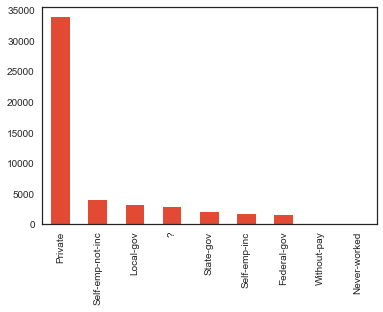

In [3]:
# age está ok, sem nulos, descritiva ok
# analisar e potencializar workclass

print(df.workclass.value_counts())
df.workclass.value_counts().plot(kind='bar');

# mais de 5% dos dados não possuem informação de workclass, vamos marcar com uma dummie e acompanhar
# por outro lado, quase 75% são funcionários do setor privado

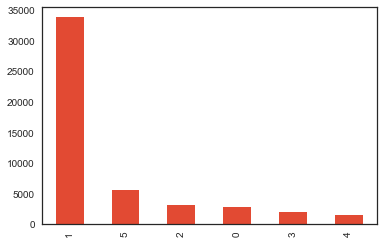

In [4]:
# vamos fazer algumas modificações e voltamos aqui posteriormente se necessário

def renameWorkclass(wc): # vamos codificar a workclass reduzindo um pouco a granularidade
    switcher = {
        'Self-emp-not-inc': 5,
        'Self-emp-inc': 5,
        'Federal-gov': 4,
        'State-gov': 3,
        'Local-gov': 2,
        'Private': 1
    }
    return switcher.get(wc, 0)

df['isPrivate'] = np.where(df.workclass=='Private', 1, 0)
df['WorkclassGroup'] = df.workclass.apply(renameWorkclass)
df['isPublic'] = np.where((df.WorkclassGroup>=2) & (df.WorkclassGroup<=4), 1, 0)

df.WorkclassGroup.value_counts().plot(kind='bar');

       education  educational-num  income
0      Preschool                1      83
1        1st-4th                2     247
2        5th-6th                3     509
3        7th-8th                4     955
4            9th                5     756
5           10th                6    1389
6           11th                7    1812
7           12th                8     657
8        HS-grad                9   15784
9   Some-college               10   10878
10     Assoc-voc               11    2061
11    Assoc-acdm               12    1601
12     Bachelors               13    8025
13       Masters               14    2657
14   Prof-school               15     834
15     Doctorate               16     594


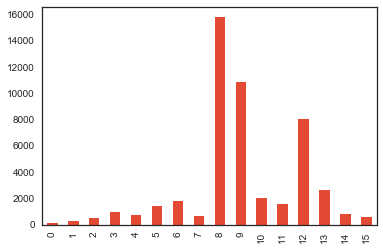

In [5]:
# vamos analisar a questao educacional e tomar algumas decisões

aux = df.groupby(['education', 'educational-num']).count()['income'].reset_index().sort_values('educational-num').reset_index(drop=True)
print(aux)
aux.income.plot(kind='bar');

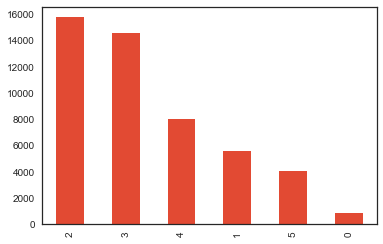

In [6]:
# novamente observamos um desbalanceamento relevante associado a uma alta granularidade, vamos propor algumas mudanças também

def groupEducation(level): # vamos codificar a workclass reduzindo um pouco a granularidade
    if level <= 3:
        return 0 # primary
    elif level <= 8:
        return 1 # secundary
    elif level <= 9:
        return 2 # HS
    elif level <= 12:
        return 3 # college ou vocacional
    elif level <= 13:
        return 4 # undergraduate
    else:
        return 5

df['EduGroup'] = df['educational-num'].apply(groupEducation)

df.EduGroup.value_counts().plot(kind='bar');

          marital-status  income
0               Divorced    6633
1      Married-AF-spouse      37
2     Married-civ-spouse   22379
3  Married-spouse-absent     628
4          Never-married   16117
5              Separated    1530
6                Widowed    1518


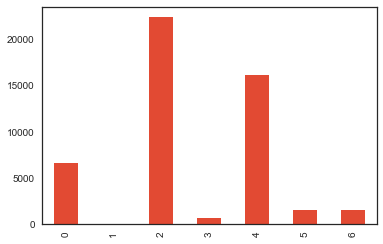

In [7]:
# vamos analisar a questao marital e de relacionamento e tomar algumas decisões

aux = df.groupby(['marital-status']).count()['income'].reset_index()
print(aux)
aux.income.plot(kind='bar');

     relationship  income
0         Husband   19716
1   Not-in-family   12583
2  Other-relative    1506
3       Own-child    7581
4       Unmarried    5125
5            Wife    2331


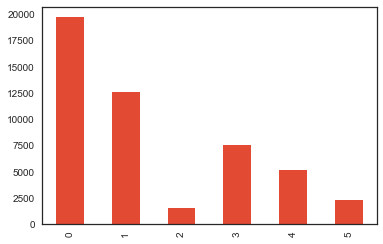

In [8]:
aux = df.groupby(['relationship']).count()['income'].reset_index()
print(aux)
aux.income.plot(kind='bar');

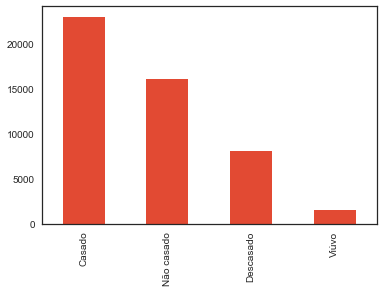

In [9]:
# novamente observamos um desbalanceamento relevante associado a uma alta granularidade, vamos propor algumas mudanças também
# para relationship vamos manter os dados originais

def groupMarital(status): # vamos codificar a workclass reduzindo um pouco a granularidade
    switcher = {
        'Divorced': 'Descasado',
        'Separated': 'Descasado',
        'Married-spouse-absent': 'Casado',
        'Married-civ-spouse': 'Casado',
        'Married-AF-spouse': 'Casado',
        'Never-married': 'Não casado',
        'Widowed': 'Viúvo'
    }
    return switcher.get(status, 'Outros')

df['MaritalGroup'] = df['marital-status'].apply(groupMarital)

df.MaritalGroup.value_counts().plot(kind='bar');

                 race  income
0  Amer-Indian-Eskimo     470
1  Asian-Pac-Islander    1519
2               Black    4685
3               Other     406
4               White   41762


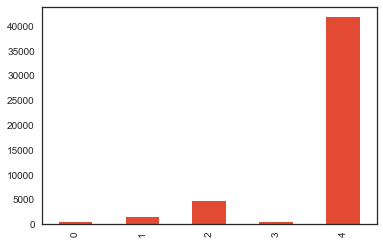

In [10]:
# vamos analisar a demografia e tomar algumas decisões

aux = df.groupby(['race']).count()['income'].reset_index()
print(aux)
aux.income.plot(kind='bar');

   gender  income
0  Female   16192
1    Male   32650


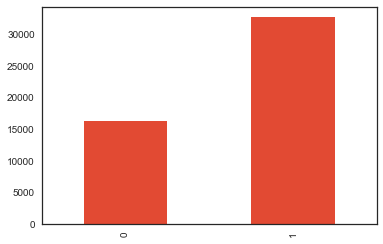

In [11]:
aux = df.groupby(['gender']).count()['income'].reset_index()
print(aux)
aux.income.plot(kind='bar');

In [12]:
# não vamos fazer nenhuma transformação ou extração para gender e race por enquanto

           occupation  income
0                   ?    2809
1        Adm-clerical    5611
2        Armed-Forces      15
3        Craft-repair    6112
4     Exec-managerial    6086
5     Farming-fishing    1490
6   Handlers-cleaners    2072
7   Machine-op-inspct    3022
8       Other-service    4923
9     Priv-house-serv     242
10     Prof-specialty    6172
11    Protective-serv     983
12              Sales    5504
13       Tech-support    1446
14   Transport-moving    2355


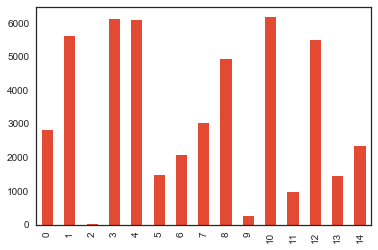

In [13]:
aux = df.groupby(['occupation']).count()['income'].reset_index()
print(aux)
aux.income.plot(kind='bar');

In [14]:
# de forma geral, não parece fazer sentido muita transformação sobre ocupação
# entretanto, vamos isolar duas profissões por curiosidade

df['isMgnt'] = np.where(df.occupation=='Exec-managerial', 1, 0)
df['isSales'] = np.where(df.occupation=='Sales', 1, 0)

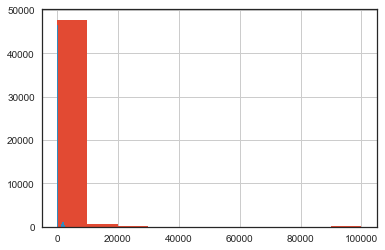

Ganho mínimo 0
Perda mínima 0


In [15]:
# temos 2 variáveis com nomes similares, de tipo int, vamos analisar as 2

df['capital-gain'].hist()
df['capital-loss'].hist()
plt.show()
print('Ganho mínimo', df['capital-gain'].min())
print('Perda mínima', df['capital-loss'].min())

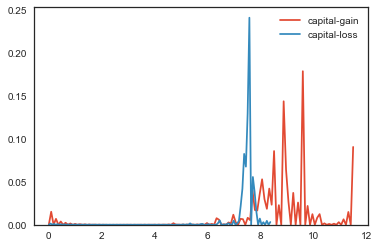

Ganho mínimo 0.0
Perda mínima 0.0


In [16]:
# observamos um problema de distribuição com os valores de capital, distanciamento da normal, vamos testar alguma transformação
# vamos somar 1 aos valores de capital para evitar log(0)=-inf
# xt = log(x+1)

gain = df['capital-gain'].apply(lambda x: np.log(x+1))
loss = df['capital-loss'].apply(lambda x: np.log(x+1))
sns.kdeplot(gain)
sns.kdeplot(loss)
plt.show()
print('Ganho mínimo', gain.min())
print('Perda mínima', loss.min())

In [17]:
# uma transformação LOG nessas 2 colunas trouxeram um balanceamento interessante bem como aproximaram os dados de uma normal

df['capital-gainLOG'] = df['capital-gain'].apply(lambda x: np.log(x+1))
df['capital-lossLOG'] = df['capital-loss'].apply(lambda x: np.log(x+1))

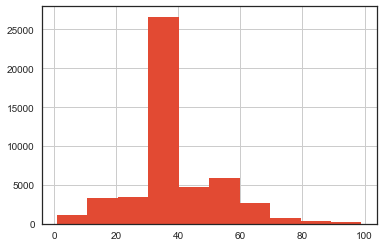

In [18]:
# analisando agora as horas trabalhadas

df['hours-per-week'].hist()
plt.show()

# nota: nenhuma observação relevante, há um pico em torno da jornada padrão de 40h, o que é esperado

                native-country  income
0                            ?     857
1                     Cambodia      28
2                       Canada     182
3                        China     122
4                     Columbia      85
5                         Cuba     138
6           Dominican-Republic     103
7                      Ecuador      45
8                  El-Salvador     155
9                      England     127
10                      France      38
11                     Germany     206
12                      Greece      49
13                   Guatemala      88
14                       Haiti      75
15          Holand-Netherlands       1
16                    Honduras      20
17                        Hong      30
18                     Hungary      19
19                       India     151
20                        Iran      59
21                     Ireland      37
22                       Italy     105
23                     Jamaica     106
24                       

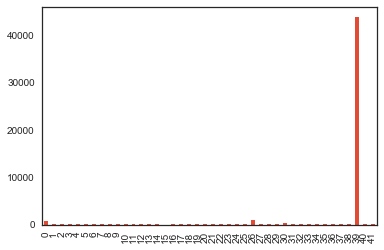

In [19]:
# vamos analisar o país de origem

aux = df.groupby(['native-country']).count()['income'].reset_index()
print(aux)
aux.income.plot(kind='bar');

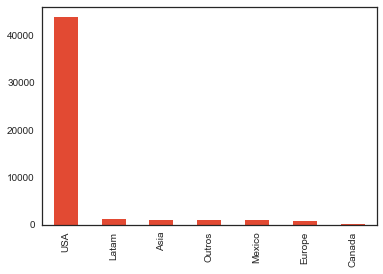

In [20]:
# novamente observamos um desbalanceamento relevante associado a uma altíssima granularidade, vamos propor algumas mudanças também

def groupOrigin(origin): # vamos codificar o país de origem reduzindo um pouco a granularidade
    switcher = {
        'United-States': 'USA', 
        'Peru': 'Latam', 
        'Guatemala': 'Latam', 
        'Mexico': 'Mexico',
        'Dominican-Republic': 'Latam', 
        'Ireland': 'Europe', 
        'Germany': 'Europe', 
        'Philippines': 'Asia',
        'Thailand': 'Asia', 
        'Haiti': 'Latam', 
        'El-Salvador': 'Latam', 
        'Puerto-Rico': 'Latam', 
        'Vietnam': 'Asia',
        'Columbia': 'Latam', 
        'Japan': 'Asia', 
        'India': 'Asia', 
        'Cambodia': 'Asia', 
        'Poland': 'Europe',
        'Laos': 'Asia', 
        'England': 'Europe', 
        'Cuba': 'Latam', 
        'Taiwan': 'Asia', 
        'Italy': 'Europe', 
        'Canada': 'Canada', 
        'Portugal': 'Europe',
        'China': 'Asia', 
        'Nicaragua': 'Latam', 
        'Honduras': 'Latam', 
        'Iran': 'Asia', 
        'Scotland': 'Europe', 
        'Jamaica': 'Latam',
        'Ecuador': 'Latam', 
        'Yugoslavia': 'Europe', 
        'Hungary': 'Europe', 
        'Hong': 'Asia', 
        'Greece': 'Europe',
        'Trinadad&Tobago': 'Latam', 
        'Outlying-US(Guam-USVI-etc)': 'USA', 
        'France': 'Europe',
        'Holand-Netherlands': 'Europe'
    }
    return switcher.get(origin, 'Outros')

df['OriginGroup'] = df['native-country'].apply(groupOrigin)

df.OriginGroup.value_counts().plot(kind='bar');

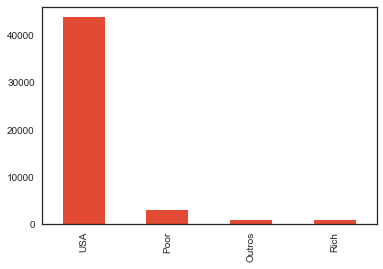

In [21]:
def groupOriginRich(origin): # vamos codificar os grupos por origem majoritária rica ou pobre reduzindo um pouco a granularidade
    switcher = {
        'USA': 'USA', 
        'Canada': 'Rich', 
        'Mexico': 'Poor', 
        'Latam': 'Poor', 
        'Asia': 'Poor', 
        'Europe': 'Rich'
    }
    return switcher.get(origin, 'Outros')

df['OriginGroupRich'] = df['OriginGroup'].apply(groupOriginRich)

df.OriginGroupRich.value_counts().plot(kind='bar');

  income  isSales
0  <=50K    37155
1   >50K    11687


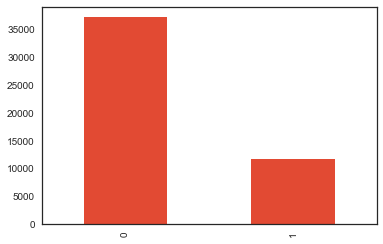

In [22]:
# finalmente vamos analisar nossa variável target de interesse

aux = df.groupby(['income']).count()['isSales'].reset_index()
print(aux)
aux.isSales.plot(kind='bar');

# nota: há um desbalanceamento entre as classes, analisar desempenho do modelo com cuidado a isto

In [23]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'isPrivate', 'WorkclassGroup', 'isPublic', 'EduGroup',
       'MaritalGroup', 'isMgnt', 'isSales', 'capital-gainLOG',
       'capital-lossLOG', 'OriginGroup', 'OriginGroupRich'],
      dtype='object')

**************************************************************************************************** 
*
* FEATURE EXTRACTION REPORT 
*
* X:  age | occupation | relationship | race | gender | hours-per-week | isPrivate | WorkclassGroup | isPublic | EduGroup | MaritalGroup | isMgnt | isSales | capital-gainLOG | capital-lossLOG | OriginGroup | OriginGroupRich
* y:  income
* M:  (48842, 17) | (48842, 1)
* 
****************************************************************************************************



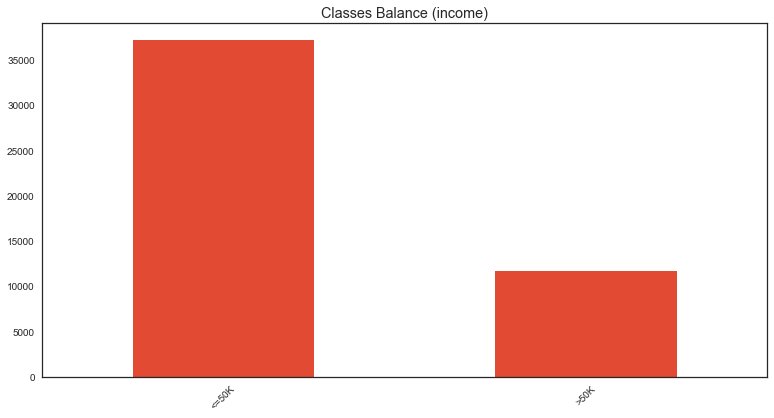

**************************************************************************************************** 
*
* DATA OVERVIEW FOR THIS DATASET 
*
* DATA SHAPE:  (48842, 18)
* COLUMNS INFO:  age (int64), occupation (object), relationship (object), race (object), gender (object), hours-per-week (int64), isPrivate (int32), WorkclassGroup (int64), isPublic (int32), EduGroup (int64), MaritalGroup (object), isMgnt (int32), isSales (int32), capital-gainLOG (float64), capital-lossLOG (float64), OriginGroup (object), OriginGroupRich (object), income (object)
* 
****************************************************************************************************

DATA SAMPLE: 
       age      occupation   relationship   race  gender  hours-per-week  \
12905   27    Adm-clerical      Unmarried  Black  Female              30   
27506   26  Prof-specialty  Not-in-family  White    Male              70   
665     43  Prof-specialty  Not-in-family  White  Female              32   
32924   44    Craft-repair 

In [36]:
# vamos agora separar os dados entre features e target

y_cols = ['income']
ignore_cols = ['workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'capital-gain', 'capital-loss', 'native-country']

rm = rubia_models.rubia_models(df, debug=False)
rm.explore(rm.data_raw, y_cols, ignore_cols, graph=True)
rm.describe(rm.M)

In [37]:
# agora vamos codificar usando LabelEncoder (alternativa disponível também para OneHotEncoder)

# usando LabelEncoder atingimos 79.3% na amostra de teste com precisão, recall e f1 de 80% para as 2 classes

#rm.encode(encoder='LabelEncoder')
rm.encode(encoder='OneHotEncoder', who='X')
rm.M.info()
rm.M.head().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 61 columns):
age                             48842 non-null int64
hours-per-week                  48842 non-null int64
isPrivate                       48842 non-null int32
WorkclassGroup                  48842 non-null int64
isPublic                        48842 non-null int32
EduGroup                        48842 non-null int64
isMgnt                          48842 non-null int32
isSales                         48842 non-null int32
capital-gainLOG                 48842 non-null float64
capital-lossLOG                 48842 non-null float64
occupation_?                    48842 non-null uint8
occupation_Adm-clerical         48842 non-null uint8
occupation_Armed-Forces         48842 non-null uint8
occupation_Craft-repair         48842 non-null uint8
occupation_Exec-managerial      48842 non-null uint8
occupation_Farming-fishing      48842 non-null uint8
occupation_Handlers-cleaners    48842 n

,0,1,2,3,4
age,25,38,28,44,18
hours-per-week,40,50,40,40,30
isPrivate,1,1,0,1,0
WorkclassGroup,1,1,2,1,0
isPublic,0,0,1,0,0
...,...,...,...,...,...
OriginGroupRich_Poor,0,0,0,0,0
OriginGroupRich_Rich,0,0,0,0,0
OriginGroupRich_USA,1,1,1,1,1
OriginGroupRich_nan,0,0,0,0,0


In [38]:
# podemos aplicar um rebalanceamento automático aos dados, vamos iniciar sem balanceamento para evitar a perda de dados (0)
# ou seja, não vamos balancear

# UPDATE: sem balanceamento os modelos atingem 84% de acurácia porém o recall da classe 1 está muito baixo
#  em torno de 55% para classe 1 nos melhores classificadores (KNN tunado)
# vamos balancear e ver se temos melhor resultado (usando tolerância de 80%)

rm.balance(0.8, rm.M, y_cols, ignore_cols)

Column removed (constant value): occupation_nan
Column removed (constant value): relationship_nan
Column removed (constant value): race_nan
Column removed (constant value): gender_nan
Column removed (constant value): MaritalGroup_nan
Column removed (constant value): OriginGroup_nan
Column removed (constant value): OriginGroupRich_nan
**************************************************************************************************** 
*
* FEATURE EXTRACTION REPORT 
*
* X:  age | hours-per-week | isPrivate | WorkclassGroup | isPublic | EduGroup | isMgnt | isSales | capital-gainLOG | capital-lossLOG | occupation_? | occupation_Adm-clerical | occupation_Armed-Forces | occupation_Craft-repair | occupation_Exec-managerial | occupation_Farming-fishing | occupation_Handlers-cleaners | occupation_Machine-op-inspct | occupation_Other-service | occupation_Priv-house-serv | occupation_Prof-specialty | occupation_Protective-serv | occupation_Sales | occupation_Tech-support | occupation_Transport-mo

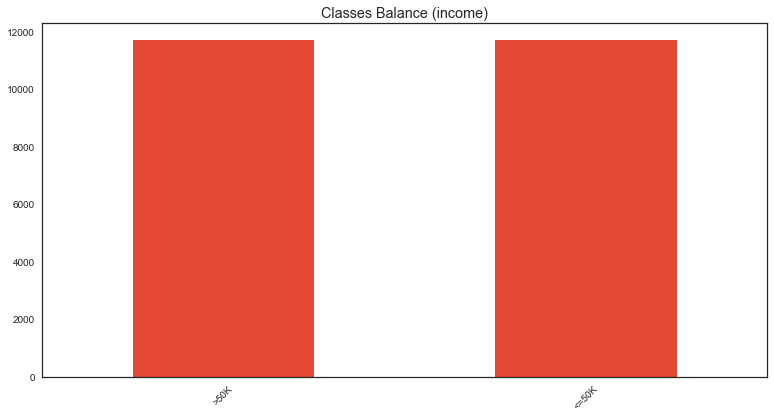

In [39]:
# não vamos subir a ordem dos dados, ou seja, não vamos aplicar transformações polinomiais agora e atualizar a matriz M

rm.addTerms(rm.X, rm.y, levels=1, interaction=False, root=False)
rm.explore(rm.M, y_cols, ignore_cols, graph=True)

In [40]:
# vamos avaliar o tipo de modelagem sugerida pelo algoritmo e validar

rm.analyse(y_cols)
print(rm.strategy)

classification


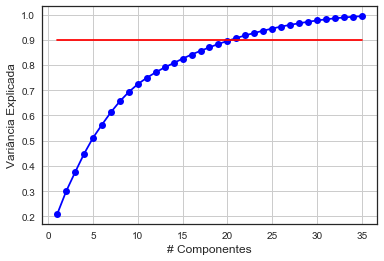

In [43]:
# vamos aplicar uma redução de dimensionalidade por PCA e checar quantas componentes são necessárias para explicar 90% da var
# vamos testar primeiro aplicando um scaler MinMax para evitar que algumas features dominem as demais (diferença de ordem)

n_components = 35

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaledX = scaler.fit_transform(rm.X)
X_pca = PCA(n_components=n_components).fit(scaledX)

plt.plot([i for i in range(1, n_components+1)], np.cumsum(X_pca.explained_variance_ratio_), 'bo-')
plt.plot([1, n_components], [0.9, 0.9], 'r-')
plt.xlabel('# Componentes')
plt.ylabel('Variância Explicada')
plt.grid()

In [44]:
ncomponents = 20

rm.redux(k=ncomponents, mode='pca', transform='MinMax')
print('Explained variance (%)', rm.scalerX_pca.explained_variance_ratio_.sum())
 
rm.M

Explained variance (%) 0.8953275555385383


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,income
0,0.641594,-0.171890,-0.675459,-0.805639,0.011131,-0.074785,-0.844680,0.178241,-0.285954,0.485882,...,0.481330,0.369441,-0.490047,-0.652680,0.295101,-0.202925,0.061509,-0.283534,-0.015020,<=50K
1,1.077744,1.401962,-0.378367,0.391559,-0.288317,-0.237653,0.658340,-0.121989,0.141372,1.038563,...,-0.319478,-0.135160,0.473492,-0.269177,0.335088,0.110429,-0.101877,-0.006434,0.065855,<=50K
2,1.423864,-0.623006,-0.138017,0.294171,-0.695101,1.001707,-0.869505,-0.147141,-0.061626,0.308591,...,-0.199678,-0.163244,-0.064156,-0.122082,-0.008328,-0.155220,0.007044,0.370486,-0.081831,<=50K
3,1.599565,-0.264151,-0.010912,0.500582,1.762278,0.432116,0.004912,-0.421040,0.156678,-0.683612,...,-0.028999,-0.054329,-0.103964,0.007593,0.224063,-0.349602,-0.944646,0.145134,0.139090,<=50K
4,1.378532,0.300525,-0.334052,-0.053121,-0.223878,-0.049460,-1.070927,0.064404,-0.380669,0.279053,...,0.474379,0.271276,-0.418968,-0.543765,0.529172,-0.445338,0.026615,0.110287,-0.024444,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23369,1.534814,0.016503,-0.098454,0.053370,0.128353,-0.315929,0.027649,-0.787501,0.960483,-0.459275,...,-0.085652,0.344397,0.494035,-0.117810,0.216574,-0.148414,-0.182826,0.216751,0.096459,>50K
23370,-0.739108,-0.486642,0.047977,0.175610,-0.150076,-0.290150,-0.025221,0.080418,-0.052198,-0.012255,...,0.197852,0.217393,0.523359,-0.336637,-0.032859,0.118049,-0.063273,0.035715,-0.002059,>50K
23371,-0.901451,0.552230,-0.686043,-0.143386,-0.096539,-0.266251,-0.065999,0.517663,-0.445729,-0.260483,...,-0.481983,-0.514087,0.049556,-0.140185,0.069245,0.008922,-0.037617,0.076423,-0.046419,>50K
23372,-0.781107,-0.667716,-0.113108,0.331958,-0.640199,0.940213,0.108638,-0.165156,0.196321,0.018838,...,-0.092727,-0.240029,-0.328426,0.105065,0.068467,-0.107494,0.049986,-0.204353,0.649919,>50K




**************************************************************************************************** 
*
* CLASSIFICATION RESULTS - BEFORE PARAMETERS BOOSTING 
*
**************************************************************************************************** 
                                    Model  Elapsed Time  Score (avg)  \
0                     Logistic classifier      0.517617     0.799095   
1                        Ridge classifier      0.384970     0.796528   
2            Linear discriminant analysis      0.583408     0.795244   
3                          SGD classifier      0.505620     0.793106   
4      K nearest neighbors classifier K10      1.240655     0.788399   
5       K nearest neighbors classifier K5      1.060166     0.782043   
6                    Gaussian naive bayes      0.255317     0.759672   
7                   Bernoulli naive bayes      0.376992     0.756555   
8   Nearest centroid classifier euclidian      0.169547     0.749405   
9              

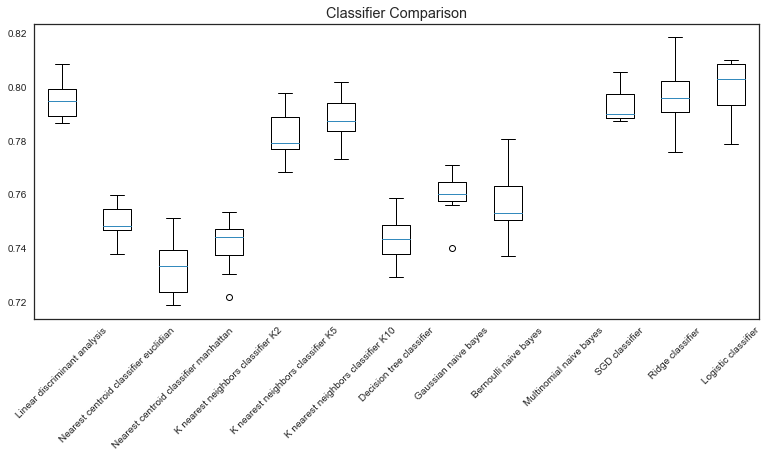

In [45]:
# vamos definir um range de alphas requerido por alguns modelos, aplicar o algoritmo e avaliar qual tem melhor desempenho

alphas = 10 ** np.linspace(10, -2, 100) * 0.5
rm.evaluate(test_size=0.3, transformX='None', transformY='None', folds=10, alphas=alphas, graph=True)

K 2 metric euclidean time 0.0827779769897461
K 5 metric euclidean time 0.10671496391296387
K 8 metric euclidean time 0.1326448917388916
K 12 metric euclidean time 0.13862919807434082
K 16 metric euclidean time 0.14361572265625
K 20 metric euclidean time 0.17253875732421875
K 30 metric euclidean time 0.21143484115600586
K 40 metric euclidean time 0.25232553482055664
K 80 metric euclidean time 0.4497976303100586
K 160 metric euclidean time 0.7579739093780518
K 2 metric manhattan time 0.09075760841369629
K 5 metric manhattan time 0.11968016624450684
K 8 metric manhattan time 0.13463997840881348
K 12 metric manhattan time 0.16356277465820312
K 16 metric manhattan time 0.17353606224060059
K 20 metric manhattan time 0.1874983310699463
K 30 metric manhattan time 0.21342921257019043
K 40 metric manhattan time 0.26329612731933594
K 80 metric manhattan time 0.4547841548919678
K 160 metric manhattan time 0.7240638732910156
K 2 metric cityblock time 0.09175539016723633
K 5 metric cityblock time 0.

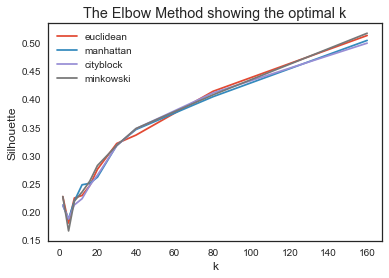

In [46]:
# os algoritmos por KNN, logistic, ridge e LDA apresentaram desempenhos muito semelhantes, em torno de 80%
# todos com boa performance (abaixo de 1 segundo para 10 folds e coeeficiente de variação abaixo de 2%)

# para otimizar o KNN, vamos entender melhor a relação entre o valor de K e o discernimento dos dados

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time

sample = rm.X.sample(2000) # vamos amostrar um conjunto menor de dados para acelerar o processo de análise

metrics = ['euclidean', 'manhattan', 'cityblock', 'minkowski']
for metric in metrics:
    silhouette = []
    K = [2, 5, 8, 12, 16, 20, 30, 40, 80, 160]
    for k in K:
        t0 = time.time()
        kmeanModel = KMeans(n_clusters=k).fit(sample)
        silhouette.append(silhouette_score(sample, kmeanModel.labels_, metric=metric))
        print('K',k,'metric',metric,'time',time.time()-t0)
    plt.plot(K, silhouette, 'x-', label=metric)
    
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('The Elbow Method showing the optimal k')
plt.legend()
plt.show()

Available hyper-parameters ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights']
[{'clf__n_jobs': [-1], 'clf__n_neighbors': [40], 'clf__weights': ['uniform', 'distance'], 'clf__metric': ['euclidean', 'manhattan', 'cityblock', 'minkowski'], 'clf__p': [1, 2]}] 

**************************************************************************************************** 
*
* HYPER-PARAMETER TUNING REPORT
*
* SCORING METHOD: accuracy
* BEST SCORE: 79.2 %
* BEST PARAMS: {'clf__metric': 'euclidean', 'clf__n_jobs': -1, 'clf__n_neighbors': 40, 'clf__p': 1, 'clf__weights': 'uniform'}
*
 ****************************************************************************************************
Pipeline(memory=None,
         steps=[('scl', None),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='euclidean', metric_params=None,
                                      n_jobs=-1, n_neigh

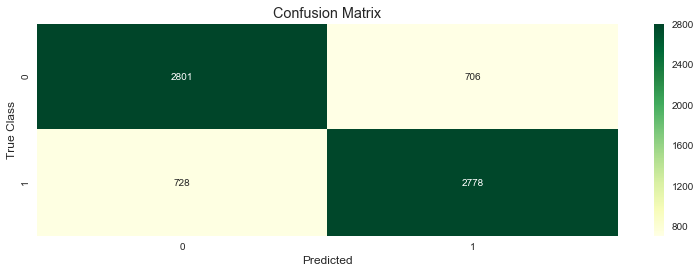

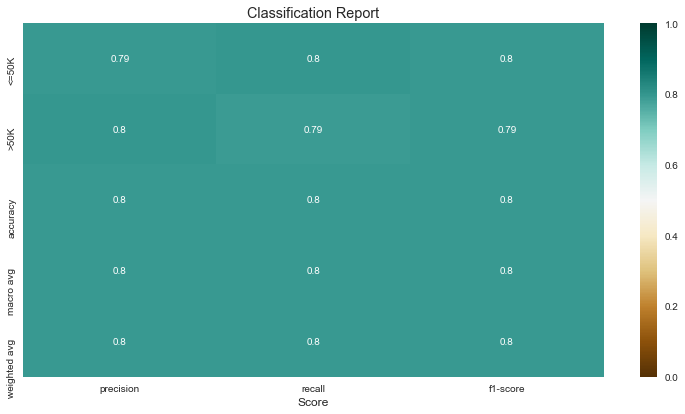

'Accuracy: 79.6%'

In [50]:
# finalmente vamos aplicar um gridsearch para tunar os hiper parâmetros

#rm.optimize(str(rm.report_performance.Model.iloc[0]), graph=graph, xy=xy, fixed=fixed)
rm.optimize('K nearest neighbors classifier K10', graph=True, xy=(0, 1), fixed={'k': 40})

Available hyper-parameters ['n_components', 'priors', 'shrinkage', 'solver', 'store_covariance', 'tol']
[{'clf__shrinkage': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]), 'clf__solver': ['svd', 'lsqr', 'eigen'], 'clf__n_components': [2, 3, 5, 10]}] 

**************************************************************************************************** 
*
* HYPER-PARAMETER TUNING REPORT
*
* SCORING METHOD: accuracy
* BEST SCORE: 79.3 %
* BEST PARAMS: {'clf__n_components': 2, 'clf__shrinkage': 0.0, 'clf__solver': 'lsqr'}
*
 ****************************************************************************************************
Pipeline(memory=None,
         steps=[('scl', None),
                ('clf',
                 LinearDiscriminantAnalysis(n_components=2, priors=None,
                                            shrinkage=0.0, solver='lsqr',
                                            store_covariance

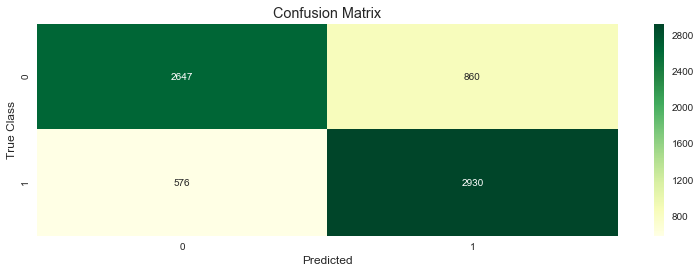

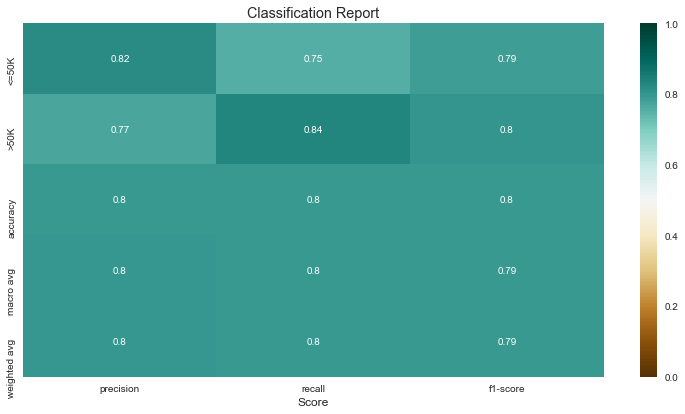

'Accuracy: 79.5%'

In [48]:
# finalmente vamos aplicar um gridsearch para tunar os hiper parâmetros

#rm.optimize(str(rm.report_performance.Model.iloc[0]), graph=graph, xy=xy, fixed=fixed)
rm.optimize('Linear discriminant analysis', graph=True, xy=(0, 1), fixed={})

Available hyper-parameters ['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start']
[{'clf__n_jobs': [-1], 'clf__C': [1, 10, 100, 1000], 'clf__penalty': ['l1', 'l2', 'elasticnet', 'none'], 'clf__multi_class': ['auto', 'ovr', 'multinomial']}] 

**************************************************************************************************** 
*
* HYPER-PARAMETER TUNING REPORT
*
* SCORING METHOD: accuracy
* BEST SCORE: 80.0 %
* BEST PARAMS: {'clf__C': 1, 'clf__multi_class': 'auto', 'clf__n_jobs': -1, 'clf__penalty': 'l1'}
*
 ****************************************************************************************************
Pipeline(memory=None,
         steps=[('scl', None),
                ('clf',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
             

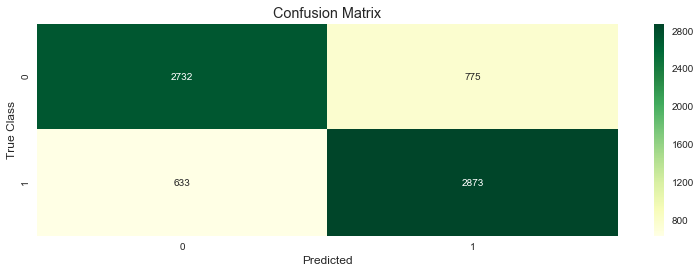

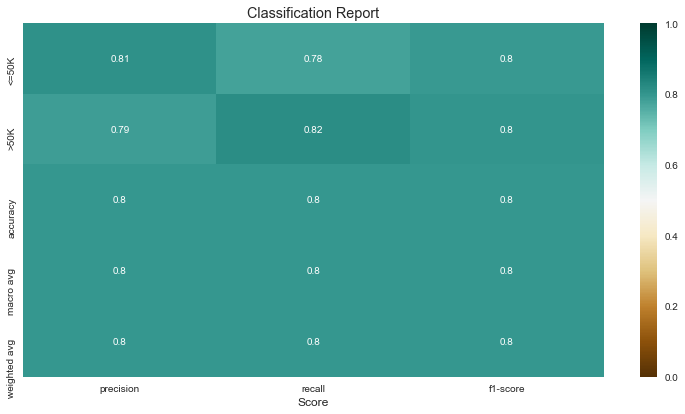

'Accuracy: 79.9%'

In [49]:
# finalmente vamos aplicar um gridsearch para tunar os hiper parâmetros

#rm.optimize(str(rm.report_performance.Model.iloc[0]), graph=graph, xy=xy, fixed=fixed)
rm.optimize('Logistic classifier', graph=True, xy=(0, 1), fixed={})

# Conclusões

* o balanceamento reduziu o tamanho do dataset em +50% e a acurácia geral de 84 para 80% 
* positivamente, o modelo ficou mais equilibrado, subindo o recall para a classe 1 de 55 para 80%
* o modelo final obtido é bastante estável e robusto, com excelente repetibilidade entre diferentes runs
* o modelo final obtido também é muito equilibrado em precisão e recall para as 2 classes, f1-score de 80%
* todos os 3 algoritmos testados apresentam desempenhos semelhantes, sendo KNN o mais equilibrado e acurado
* não foi observada diferença de performance quando usando LabelEncoder ou OneHotEncoder

# Resultado Final
* **Algoritmo:** KNN (neighbors=40, metric=euclidean, weights=uniform)
* **Acurácia:** 80%
* **Precisão:** 80%
* **Recall:** 80%
* **F1-score:** 80%